AlexNet menggunakan TensorFlow dan Keras.

hal yang harus diperhatikan :
1. Data Loading - Data loading meliputi proses membuat fungsi untuk 
(1) meload data dari file eksternal dengan parameter lokasi direktori, 
(2) ukuran gambar, dan 
(3) ukuran batch, di mana 
(4) output dari fungsi adalah berupa dataset yang berisi data gambar dan labelnya.
2. Data Checking / Data Visualization - Data visualization meliputi proses membuat fungsi untuk 
(1) menampilkan data gambar dengan parameter jumlah gambar yang akan ditampilkan, 
(2) ukuran gambar, dan 
(3) label gambar, di mana 
(4) output dari fungsi adalah berupa visualisasi gambar sesuai dengan parameter input yang ditentukan.
3. Data Preparation - Data preparation meliputi proses (1) normalisasi data gambar dengan
benar, 
(2) visualisasi sample data hasil normalisasi, 
(3) pembagian data menjadi train, validation, dan test, serta 
(4) menampilkan ukuran dari masing-masing train, validation and test data
4. Model Architecture - Model architecture meliputi proses 
(1) penentuan input, 
(2) penentuan layer convolution, pooling, flatten, dan dense dengan tepat, 
(3) kompilasi model, dan 
(4) menampilkan model summary
5. Model Training - Model training meliputi proses
(1) training model menggunakan sejumlah iterasi/epoch, 
(2) menampilkan visualisasi nilai akurasi train dan validation setiap epoch, 
(3) menampilkan visualisasi loss train dan validation setiap epoch, serta 
(4) menyimpan model yang dihasilkan
6. Model Evaluation - Model evaluation meliputi proses
(1) prediksi untuk setiap data yang ada di test set menggunakan model yang telah disimpan, 
(2) menampilkan beberapa contoh hasil prediksi, 
(3) mengenerate confusion matrix, dan
(4) menampilkan visualisasi confusion matrix.
7. Model Deployment - Model deployment meliputi proses (1) dump model terbaik, 
(2) pembuatan antarmuka aplikasi dengan streamlit, 
(3) publikasi ke github, dan 
(4) deployment aplikasi di streamlit cloud



Libraries

In [29]:
# Import TensorFlow library utama
import tensorflow as tf  # Framework untuk membuat dan melatih model deep learning

# Import modul Keras untuk membangun model AlexNet
from tensorflow.keras.models import Sequential  # Untuk membuat model secara berurutan (layer-by-layer)
from tensorflow.keras.layers import Conv2D, MaxPooling2D  # Untuk layer konvolusi dan pooling
from tensorflow.keras.layers import Flatten, Dense, Dropout  # Untuk layer fully connected dan regulasi dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Untuk augmentasi data gambar
from tensorflow.keras.optimizers import Adam  # Optimizer yang sering digunakan dalam deep learning

# Library tambahan untuk manipulasi data
import numpy as np  # Untuk operasi matematika pada array
import matplotlib.pyplot as plt  # Untuk membuat grafik dan visualisasi data
import os  # Untuk membaca dan mengelola file/direktori

# Import library untuk membagi dataset
from sklearn.model_selection import train_test_split  # Membagi dataset menjadi training, validation, dan test sets

# Import library untuk evaluasi performa model
from sklearn.metrics import classification_report, confusion_matrix  
# classification_report: Memberikan metrik seperti precision, recall, F1-score
# confusion_matrix: Untuk menganalisis kesalahan klasifikasi

Data Loading

In [30]:
# Import library yang diperlukan
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fungsi untuk meload dataset
def load_dataset(directory, img_size=(180, 180), batch_size=32):
    """
    Meload data gambar dari direktori eksternal, melakukan augmentasi, dan menghasilkan dataset dengan labelnya.
    
    Parameters:
    - directory: Lokasi direktori dataset (string).
    - img_size: Ukuran gambar yang akan diresize (tuple: width, height), default (224, 224) untuk AlexNet.
    - batch_size: Jumlah data dalam satu batch, default 32.
    
    Returns:
    - dataset: Objek generator yang berisi data gambar dan labelnya.
    """
    # Membuat instance ImageDataGenerator untuk augmentasi data
    datagen = ImageDataGenerator(
        rescale=1./255,               # Normalisasi nilai piksel (0-255 menjadi 0-1)
        rotation_range=20,           # Rotasi gambar secara acak hingga 20 derajat
        width_shift_range=0.2,       # Pergeseran horizontal gambar hingga 20%
        height_shift_range=0.2,      # Pergeseran vertikal gambar hingga 20%
        shear_range=0.2,             # Transformasi shear hingga 20%
        zoom_range=0.2,              # Zoom acak hingga 20%
        horizontal_flip=True,        # Membalik gambar secara horizontal
        fill_mode='nearest'          # Mengisi piksel kosong akibat augmentasi dengan cara terdekat
    )

    # Menggunakan flow_from_directory untuk membaca gambar dari direktori
    dataset = datagen.flow_from_directory(
        directory=directory,        # Path direktori dataset
        target_size=img_size,       # Ukuran gambar (disesuaikan dengan input model)
        batch_size=batch_size,      # Ukuran batch
        class_mode='categorical'    # Label dalam bentuk one-hot encoding untuk klasifikasi multikelas
    )
    
    return dataset

# Contoh penggunaan fungsi load_dataset
# sesuaikan dengan path direktori dataset Anda
train_dataset = load_dataset(directory=r'C:\Users\pejer\OneDrive\Desktop\UAJY HUB\BISMILLAH S5 UAJY\00 - MATA KULIAH\Pembelejaran Mesin dan Pembelajaran Mendalam - B\praktek\Tugas6_X_YYYYY\Tugas6_B_11972\uasML\dataset\dataset[1]\dataset\train_data', img_size=(180, 180), batch_size=32)
val_dataset = load_dataset(directory=r'C:\Users\pejer\OneDrive\Desktop\UAJY HUB\BISMILLAH S5 UAJY\00 - MATA KULIAH\Pembelejaran Mesin dan Pembelajaran Mendalam - B\praktek\Tugas6_X_YYYYY\Tugas6_B_11972\uasML\dataset\dataset[1]\dataset\validation_data', img_size=(180, 180), batch_size=32)
test_dataset = load_dataset(directory=r'C:\Users\pejer\OneDrive\Desktop\UAJY HUB\BISMILLAH S5 UAJY\00 - MATA KULIAH\Pembelejaran Mesin dan Pembelajaran Mendalam - B\praktek\Tugas6_X_YYYYY\Tugas6_B_11972\uasML\dataset\dataset[1]\dataset\test_data', img_size=(180, 180), batch_size=32)


Found 480 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


Data Visualization

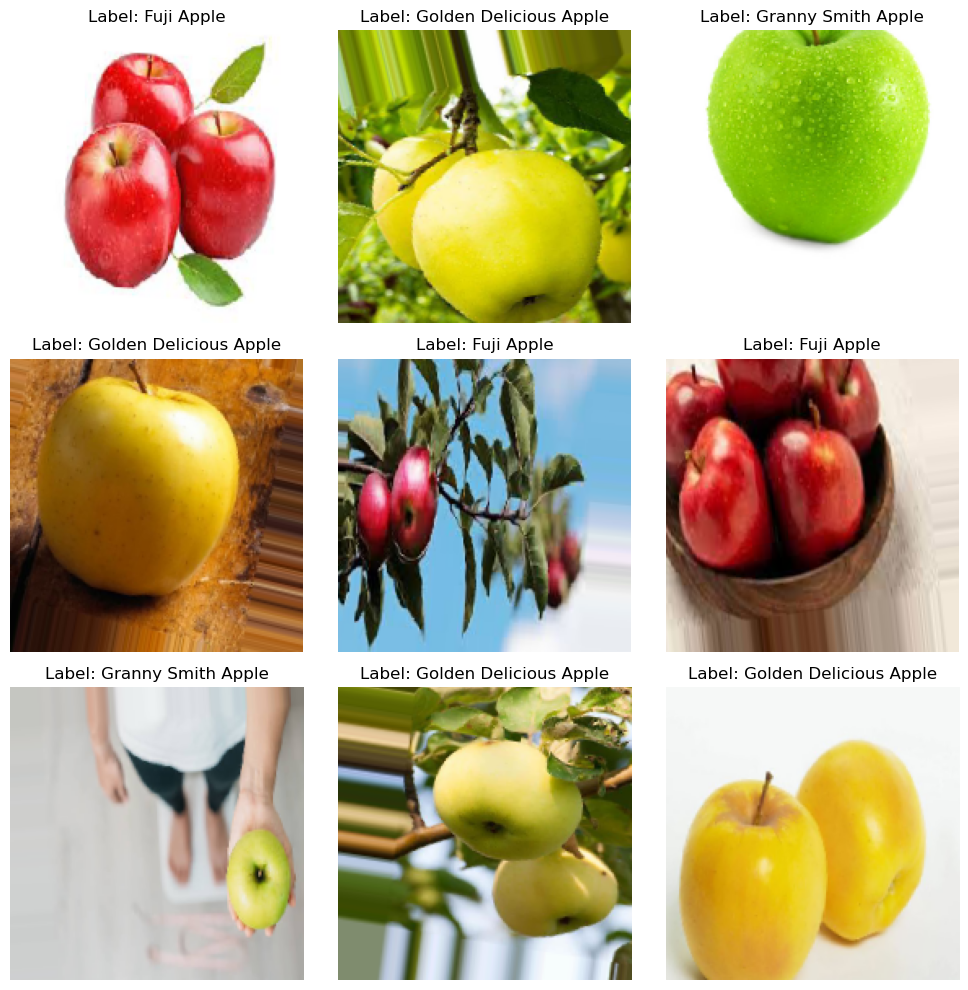

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_data(dataset, num_images=9, img_size=(180, 180)):
    """
    Menampilkan visualisasi gambar dari dataset sesuai dengan parameter yang diberikan.
    
    Parameters:
    - dataset: Dataset yang berisi gambar dan label.
    - num_images: Jumlah gambar yang akan ditampilkan.
    - img_size: Ukuran gambar yang ditampilkan (tuple: width, height).
    """
    # Ambil batch pertama dari dataset
    images, labels = next(dataset)

    # Menentukan jumlah baris dan kolom untuk plot (misalnya 3x3 untuk 9 gambar)
    num_cols = 3
    num_rows = num_images // num_cols

    # Membuat figure dan axes untuk menampilkan gambar
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

    # Mengatur index gambar yang akan ditampilkan
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            # Mengambil gambar dan label sesuai dengan index
            img = images[i]
            label = np.argmax(labels[i])  # Mengonversi label one-hot menjadi label numerik
            label_name = dataset.class_indices
            label_name = {v: k for k, v in label_name.items()}  # Mengonversi kembali indeks label ke nama kelas
            label = label_name[label]
            
            # Menampilkan gambar
            ax.imshow(img)
            ax.axis('off')  # Menghilangkan axis
            ax.set_title(f"Label: {label}")  # Menampilkan label gambar
            
    plt.tight_layout()
    plt.show()

# Contoh penggunaan fungsi visualisasi dengan dataset pelatihan
visualize_data(train_dataset, num_images=9, img_size=(180, 180))


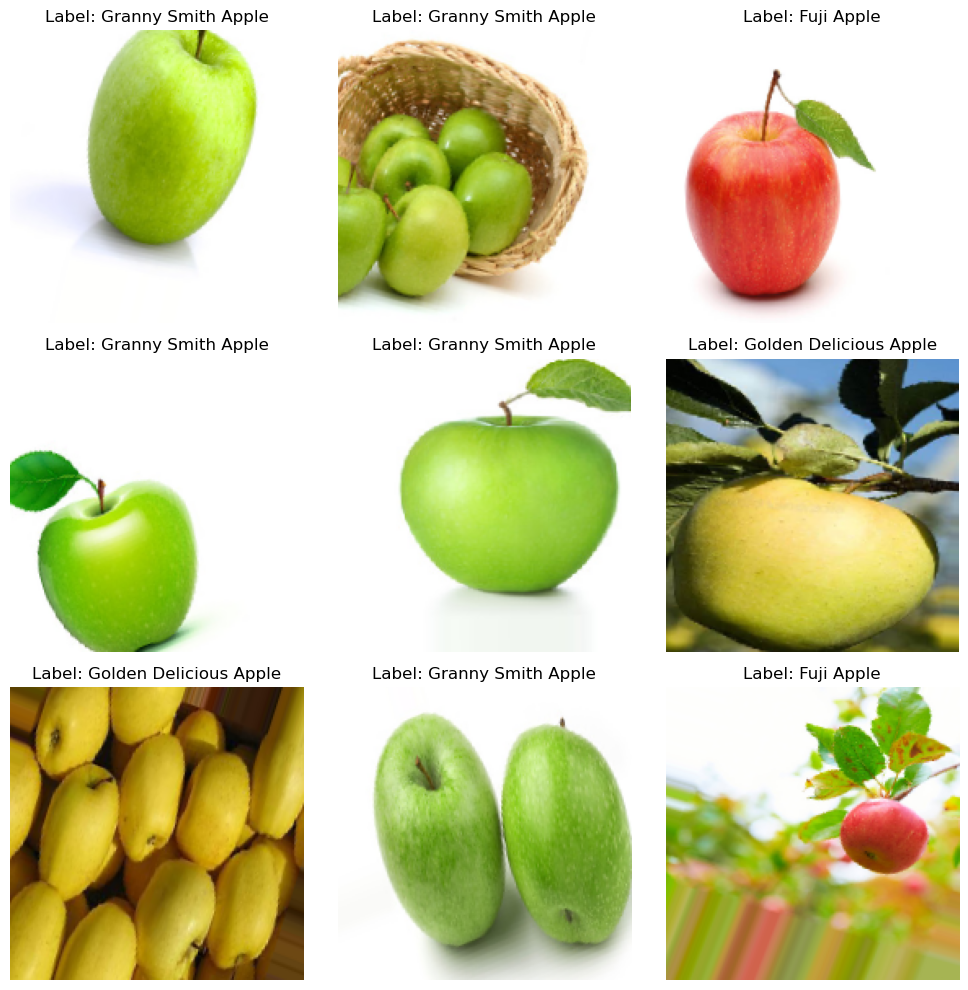

In [33]:
# Visualisasi gambar dari dataset validasi
visualize_data(val_dataset, num_images=9, img_size=(180, 180))

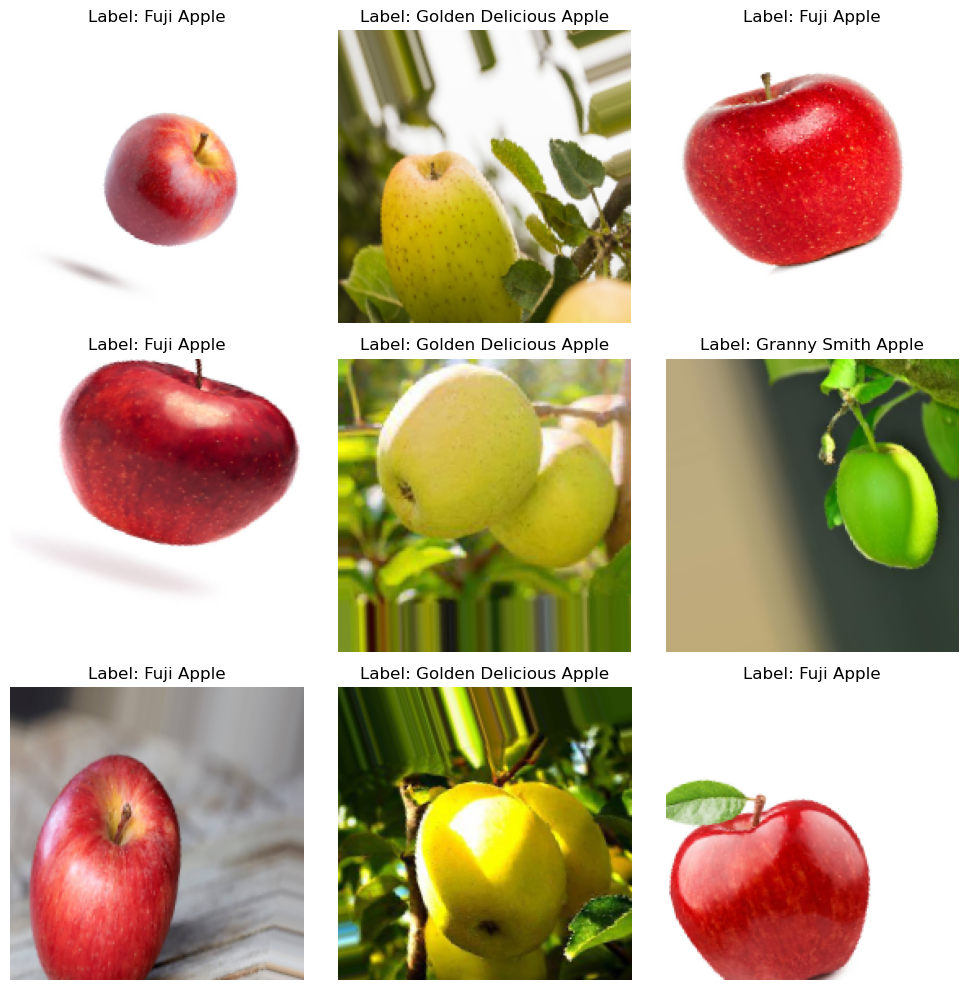

In [34]:
# Visualisasi gambar dari dataset pengujian
visualize_data(test_dataset, num_images=9, img_size=(180, 180))

Data Preparation

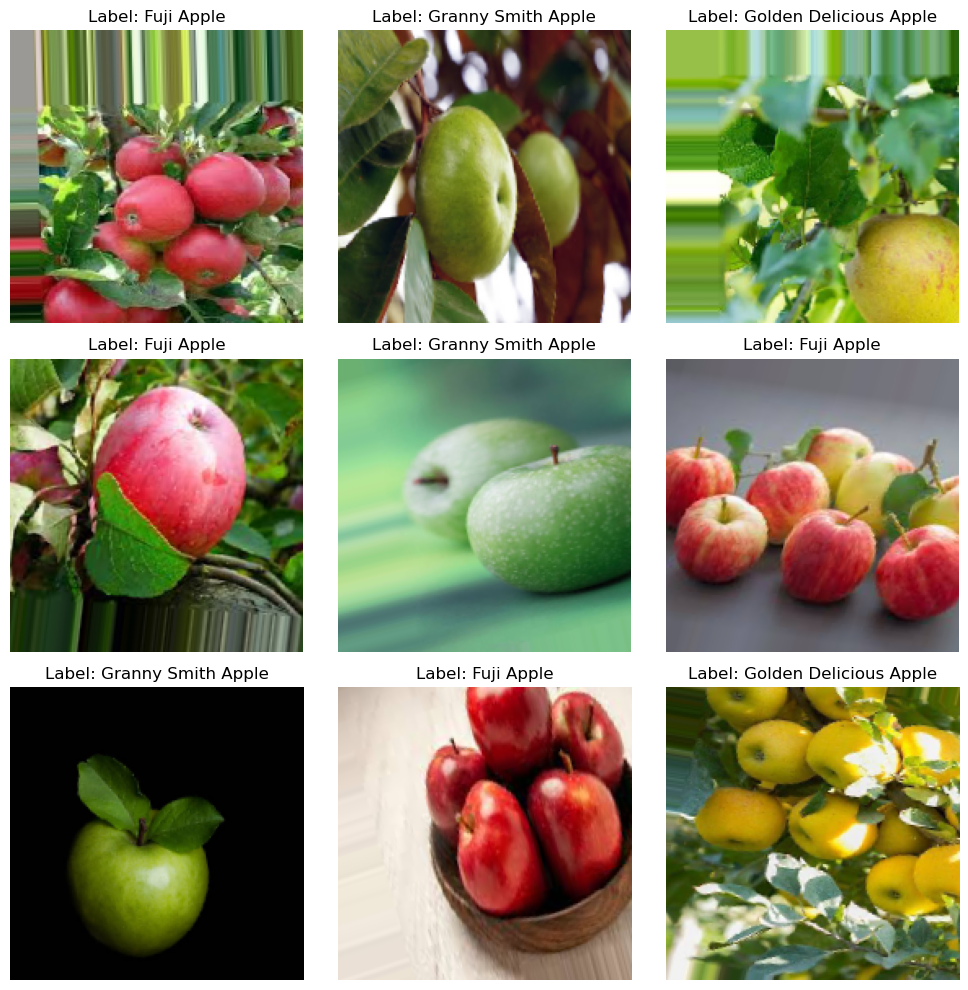

Ukuran dataset pelatihan: 480 gambar
Ukuran dataset validasi: 60 gambar
Ukuran dataset pengujian: 60 gambar


In [35]:
# Data Preparation

# 1. Normalisasi Data Gambar
# Sudah dilakukan pada saat loading data menggunakan ImageDataGenerator dengan rescale=1./255

# 2. Visualisasi Sampel Data Hasil Normalisasi
def visualize_normalized_data(dataset, num_images=9, img_size=(180, 180)):
    """
    Menampilkan gambar hasil normalisasi dari dataset.
    
    Parameters:
    - dataset: Dataset yang berisi gambar dan label.
    - num_images: Jumlah gambar yang akan ditampilkan.
    - img_size: Ukuran gambar yang ditampilkan (tuple: width, height).
    """
    # Ambil batch pertama dari dataset
    images, labels = next(dataset)

    # Menentukan jumlah baris dan kolom untuk plot (misalnya 3x3 untuk 9 gambar)
    num_cols = 3
    num_rows = num_images // num_cols

    # Membuat figure dan axes untuk menampilkan gambar
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

    # Mengatur index gambar yang akan ditampilkan
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            # Mengambil gambar dan label sesuai dengan index
            img = images[i]
            label = np.argmax(labels[i])  # Mengonversi label one-hot menjadi label numerik
            label_name = dataset.class_indices
            label_name = {v: k for k, v in label_name.items()}  # Mengonversi kembali indeks label ke nama kelas
            label = label_name[label]
            
            # Menampilkan gambar
            ax.imshow(img)
            ax.axis('off')  # Menghilangkan axis
            ax.set_title(f"Label: {label}")  # Menampilkan label gambar
            
    plt.tight_layout()
    plt.show()

# Contoh penggunaan fungsi untuk menampilkan gambar hasil normalisasi dari dataset pelatihan
visualize_normalized_data(train_dataset, num_images=9, img_size=(180, 180))

# 3. Pembagian Data Menjadi Train, Validation, dan Test
# Kita sudah meload data ke dalam train_dataset, val_dataset, dan test_dataset melalui fungsi load_dataset

# 4. Menampilkan Ukuran Masing-Masing Dataset
print(f"Ukuran dataset pelatihan: {train_dataset.samples} gambar")
print(f"Ukuran dataset validasi: {val_dataset.samples} gambar")
print(f"Ukuran dataset pengujian: {test_dataset.samples} gambar")


Model Architecture - AlexNet

In [48]:
# Cell Block 7: Define AlexNet Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the AlexNet architecture
model = Sequential([
    # Layer 1: Convolution + MaxPooling
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(180, 180, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    # Layer 2: Convolution + MaxPooling
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    # Layer 3: Convolution
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),

    # Layer 4: Convolution
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),

    # Layer 5: Convolution + MaxPooling
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    # Flatten
    Flatten(),

    # Fully Connected Layers
    Dense(4096, activation='relu'),
    Dropout(0.5),  # Dropout for regularization

    Dense(4096, activation='relu'),
    Dropout(0.5),

    Dense(train_dataset.num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 43, 43, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 43, 43, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 21, 21, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 21, 21, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 10, 10, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 10, 10, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 10, 10, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 10, 10, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 10, 10, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,327,619 (142.39 MB)

 Trainable params: 37,324,867 (142.38 MB)

 Non-trainable params: 2,752 (10.75 KB)

Model Training

In [49]:
# Cell Block 8: Train the Model
# Set training parameters
epochs = 15
batch_size = 32

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    steps_per_epoch=train_dataset.samples // batch_size,
    validation_steps=val_dataset.samples // batch_size
)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5993 - loss: 14.0676 - val_accuracy: 0.3125 - val_loss: 1118.4553
Epoch 2/15


c:\Users\pejer\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3571 - val_loss: 801.7838
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8799 - loss: 2.8200
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 531.7936
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8630 - loss: 2.3056 - val_accuracy: 0.2500 - val_loss: 242.6719
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9085 - loss: 1.1537 - val_accuracy: 0.2812 - val_loss: 332.2155
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3929 - val_loss: 315.2649
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8779 - loss: 1.1914
Epoch 10/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 0

Model Evaluation

In [50]:
# Cell Block 9: Evaluate the Model
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

c:\Users\pejer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7826 - loss: 1.3410
Test Accuracy: 78.33%
Test Loss: 1.2506


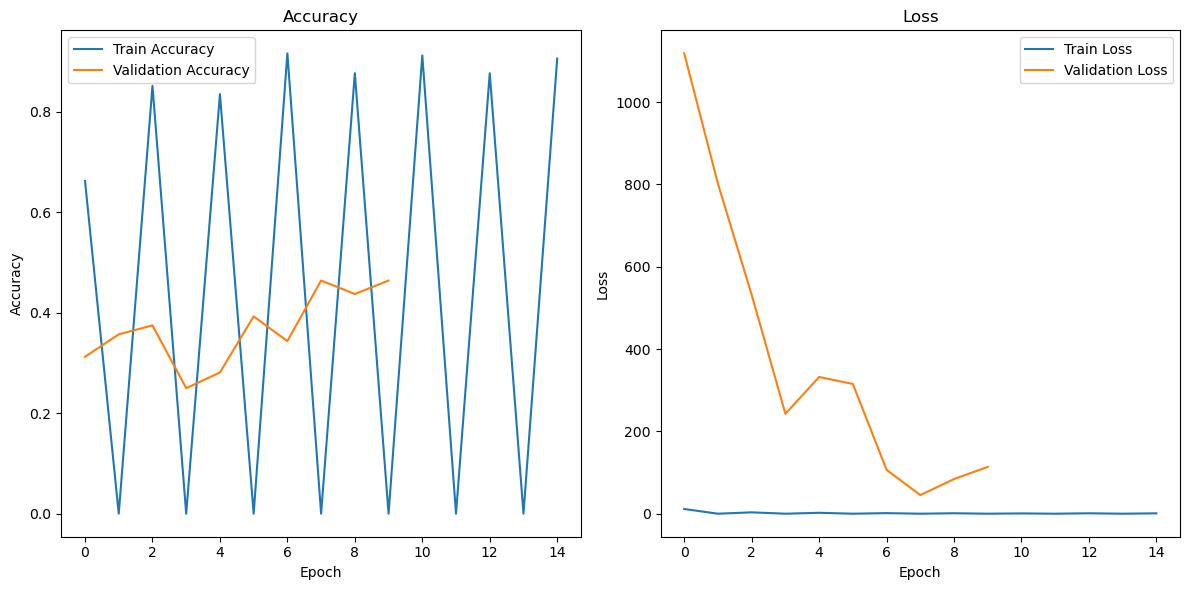

In [51]:
# Cell Block 10: Visualize Training History
# Visualize training accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
Classification Report:
                        precision    recall  f1-score   support

            Fuji Apple       0.42      0.40      0.41        20
Golden Delicious Apple       0.36      0.40      0.38        20
    Granny Smith Apple       0.21      0.20      0.21        20

              accuracy                           0.33        60
             macro avg       0.33      0.33      0.33        60
          weighted avg       0.33      0.33      0.33        60



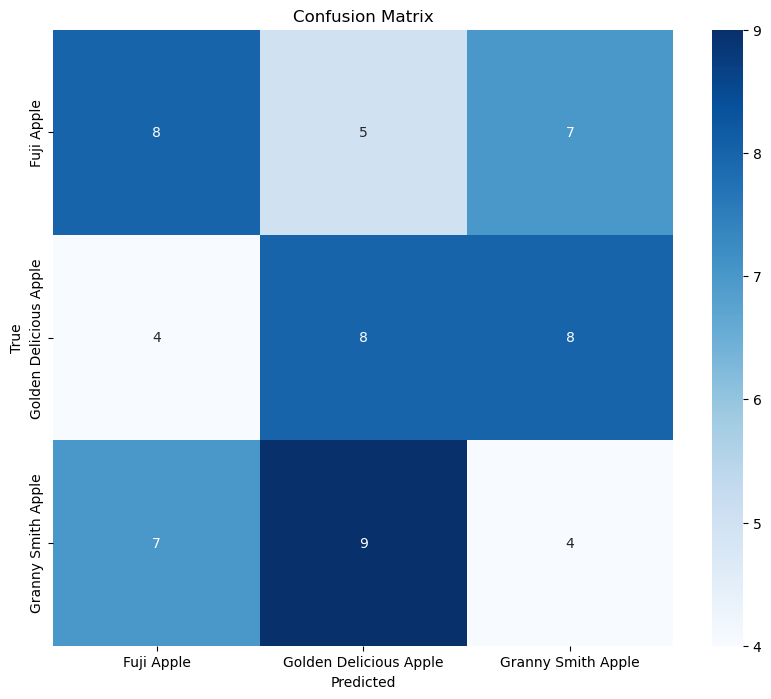

In [52]:
#Cell Block 11: Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on test dataset
y_true = test_dataset.classes
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(test_dataset.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.class_indices.keys(), yticklabels=test_dataset.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [53]:
model.save('model_alexNet.h5')